## Intro to Python for Data Analysis

### Break out session 2

In this breakout session, you will explore some data from the Guardian(theguardian.com) that provides some
data about key indicators by country from the World Economic Forum in 2013. They also have an open data explorer at http://open-platform.theguardian.com.

Import libraries.

In [1]:
import numpy as np
import pandas as pd

### Examine the data

Read in the wef csv data and look at the first five rows.

In [2]:
wef = pd.read_csv('wef.csv')
wef.head()

,Country,Emissions (tonnes per capita),Unemployment rate (%),GDP growth (%),Government debt (% of GDP),Gini coefficient
0,Australia,18.23,5.2,1.91,29.32,0.34
1,Austria,7.45,4.4,2.70,74.04,0.26
2,Belgium,9.60,8.3,1.78,91.40,0.26
3,Brazil,1.90,8.3,2.73,52.21,0.55
4,Canada,15.24,8.0,2.46,52.63,0.32


Print the column names

In [3]:
wef.columns

Index(['Country', 'Emissions (tonnes per capita)', 'Unemployment rate (%)',
       'GDP growth (%)', 'Government debt (% of GDP)', 'Gini coefficient'],
      dtype='object')

How many rows are in the dataset?

In [4]:
len(wef)

39

Make the column names lower case using a lambda function

In [5]:
wef.columns = wef.columns.map(lambda x: x.lower())
wef.head(2)

,country,emissions (tonnes per capita),unemployment rate (%),gdp growth (%),government debt (% of gdp),gini coefficient
0,Australia,18.23,5.2,1.91,29.32,0.34
1,Austria,7.45,4.4,2.70,74.04,0.26


Use the cut method to assign unemployment rate to four buckets and then obtain the value counts

In [6]:
employrateranges = pd.cut(wef['unemployment rate (%)'], 4)
pd.value_counts(employrateranges)

(3.58, 8.65]     27
(8.65, 13.7]      8
(18.75, 23.8]     2
(13.7, 18.75]     2
dtype: int64

Add a column to the dataframe called employrateranges(created above).

In [7]:
wef['employrateranges'] = employrateranges
wef.head(2)

,country,emissions (tonnes per capita),unemployment rate (%),gdp growth (%),government debt (% of gdp),gini coefficient,employrateranges
0,Australia,18.23,5.2,1.91,29.32,0.34,"(3.58, 8.65]"
1,Austria,7.45,4.4,2.70,74.04,0.26,"(3.58, 8.65]"


Index into the first three columns of the first row

In [8]:
wef.iloc[0,0:3]

country                          Australia
emissions (tonnes per capita)        18.23
unemployment rate (%)                  5.2
Name: 0, dtype: object

Slice into the first five rows of unemployment rate

In [9]:
wef['unemployment rate (%)'][:5]

0    5.2
1    4.4
2    8.3
3    8.3
4    8.0
Name: unemployment rate (%), dtype: float64

Sort unemployment rate and return the first ten values in ascending order

In [10]:
wef['unemployment rate (%)'].sort_values()[:10]

26    3.6
21    3.7
35    4.2
6     4.3
1     4.4
22    4.4
16    4.4
24    4.5
20    5.0
0     5.2
Name: unemployment rate (%), dtype: float64

Return value counts for the gini coefficient

In [11]:
wef['gini coefficient'].value_counts()

0.26    6
0.29    4
0.32    4
0.34    3
0.33    3
0.30    3
0.25    2
0.31    2
0.37    1
0.35    1
0.40    1
0.24    1
0.48    1
0.27    1
0.63    1
0.47    1
0.49    1
0.55    1
0.38    1
0.41    1
Name: gini coefficient, dtype: int64

Return a boolean value indicating if all values for unemployment rate are above 5.2 percent

In [12]:
(wef.ix[0:9,'unemployment rate (%)'] > 5.2).all()

False

Return a dataframe where unemployment rate is greater than 10 and the gini coefficient is greater then .2. Only display these two columns.

In [13]:
wef[(wef['unemployment rate (%)'] > 10) & (wef['gini coefficient'] > .20)][['unemployment rate (%)', 'gini coefficient']]

,unemployment rate (%),gini coefficient
9,16.9,0.32
13,12.5,0.31
14,11.2,0.27
17,13.5,0.29
28,10.8,0.35
30,14.4,0.26
32,23.8,0.63
33,20.1,0.32
36,11.9,0.41


Return the first ten rows of a dataframe where unemployment rate is greater than 10 or the gini coefficient is greater then .2. Return a dataframe
with country,unemployment rate, and gini coefficient columns.

In [14]:
wef[(wef['unemployment rate (%)'] > 10) | (wef['gini coefficient'] > .20)][['country','unemployment rate (%)', 'gini coefficient']][:10]

,country,unemployment rate (%),gini coefficient
0,Australia,5.2,0.34
1,Austria,4.4,0.26
2,Belgium,8.3,0.26
3,Brazil,8.3,0.55
4,Canada,8.0,0.32
5,Chile,8.1,0.49
6,China,4.3,0.47
7,Czech Republic,7.3,0.26
8,Denmark,7.4,0.25
9,Estonia,16.9,0.32


Are any of the values for gdp growth null?

In [15]:
wef['gdp growth (%)'].isnull().sum()

0

Obtain a summary of descriptive statistics for the dataset

In [16]:
wef.describe()

,emissions (tonnes per capita),unemployment rate (%),gdp growth (%),government debt (% of gdp),gini coefficient
count,39.000000,39.000000,39.000000,31.000000,39.000000
mean,8.401026,8.602564,2.510000,63.842258,0.335128
std,4.082954,4.417459,2.896838,37.120178,0.086659
min,1.640000,3.600000,-7.100000,9.140000,0.240000
25%,5.690000,5.250000,1.045000,41.580000,0.280000
50%,7.830000,7.800000,1.930000,52.210000,0.320000
75%,10.075000,9.600000,3.755000,85.540000,0.345000
max,20.380000,23.800000,9.300000,174.980000,0.630000


Display a bar plot of mean gdp growth by country with Pandas.

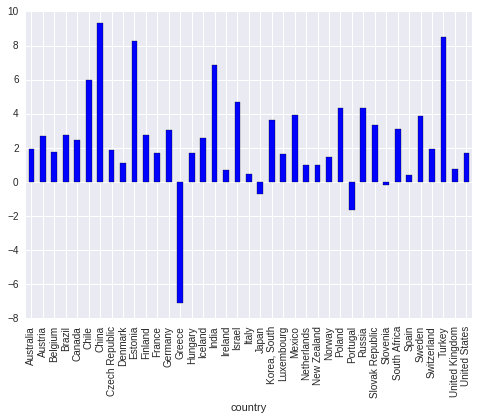

In [18]:
%matplotlib inline
import seaborn as sns
wef.groupby(['country'])['gdp growth (%)'].mean().plot(kind="bar")